In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [3]:
plt.style.use("seaborn")

In [4]:
# Toy problem: 
# - if hot then content
# - if cool then happy
# - if cold then sad

num_samples = 100
relation_operator = "prod"

# Create some data for estimating relations 
# - Input: temperature, Output: mood 
# -- temp: [0 -> 100], mood: [0 -> 1]

temp = np.linspace(0, 100, num_samples)
mood = np.linspace(0, 1, num_samples)

# Fuzzify the data (i.e., create fuzzy sets via membership functions)

mu_0, sig_0, mu_1, sig_1 = 80, 8, 100, 8
hot = fuzz.gauss2mf(temp, mu_0, sig_0, mu_1, sig_1)

mu_0, sig_0, mu_1, sig_1 = 50, 8, 70, 8
cool = fuzz.gauss2mf(temp, mu_0, sig_0, mu_1, sig_1)

mu_0, sig_0, mu_1, sig_1 = 0, 8, 30, 8
cold = fuzz.gauss2mf(temp, mu_0, sig_0, mu_1, sig_1)

mu_0, sig_0, mu_1, sig_1 = 0.55, 0.1, 0.6, 0.1
content = fuzz.gauss2mf(mood, mu_0, sig_0, mu_1, sig_1)

mu_0, sig_0, mu_1, sig_1 = 0.8, 0.1, 1, 0.1
happy = fuzz.gauss2mf(mood, mu_0, sig_0, mu_1, sig_1)

mu_0, sig_0, mu_1, sig_1 = 0, 0.1, 0.15, 0.1
sad = fuzz.gauss2mf(mood, mu_0, sig_0, mu_1, sig_1)

<IPython.core.display.Javascript object>


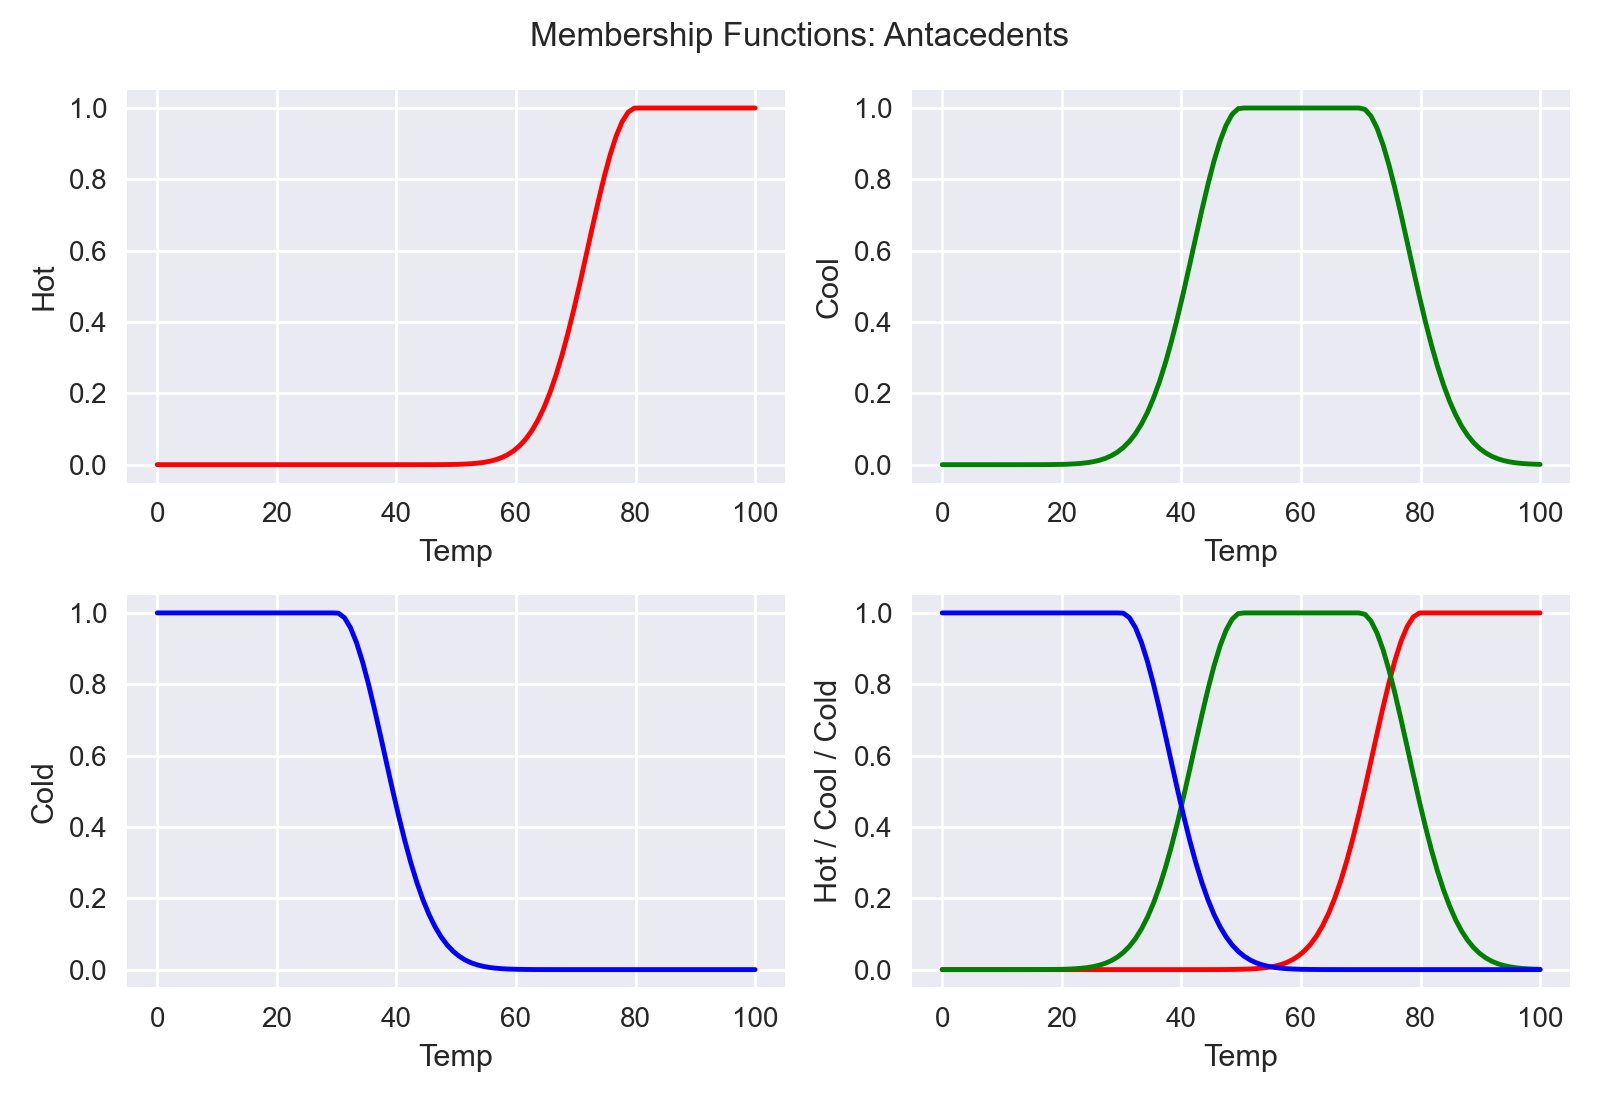

In [5]:
# Visualize antacedent membership functions

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(temp, hot, "red")
ax[0, 1].plot(temp, cool, "green")
ax[1, 0].plot(temp, cold, "blue")
ax[1, 1].plot(temp, hot, "red")
ax[1, 1].plot(temp, cool, "green")
ax[1, 1].plot(temp, cold, "blue")


ax[0, 0].set_xlabel("Temp")
ax[0, 0].set_ylabel("Hot")
ax[0, 1].set_xlabel("Temp")
ax[0, 1].set_ylabel("Cool")
ax[1, 0].set_xlabel("Temp")
ax[1, 0].set_ylabel("Cold")
ax[1, 1].set_xlabel("Temp")
ax[1, 1].set_ylabel("Hot / Cool / Cold")

fig.suptitle("Membership Functions: Antacedents")
fig.tight_layout()

<IPython.core.display.Javascript object>


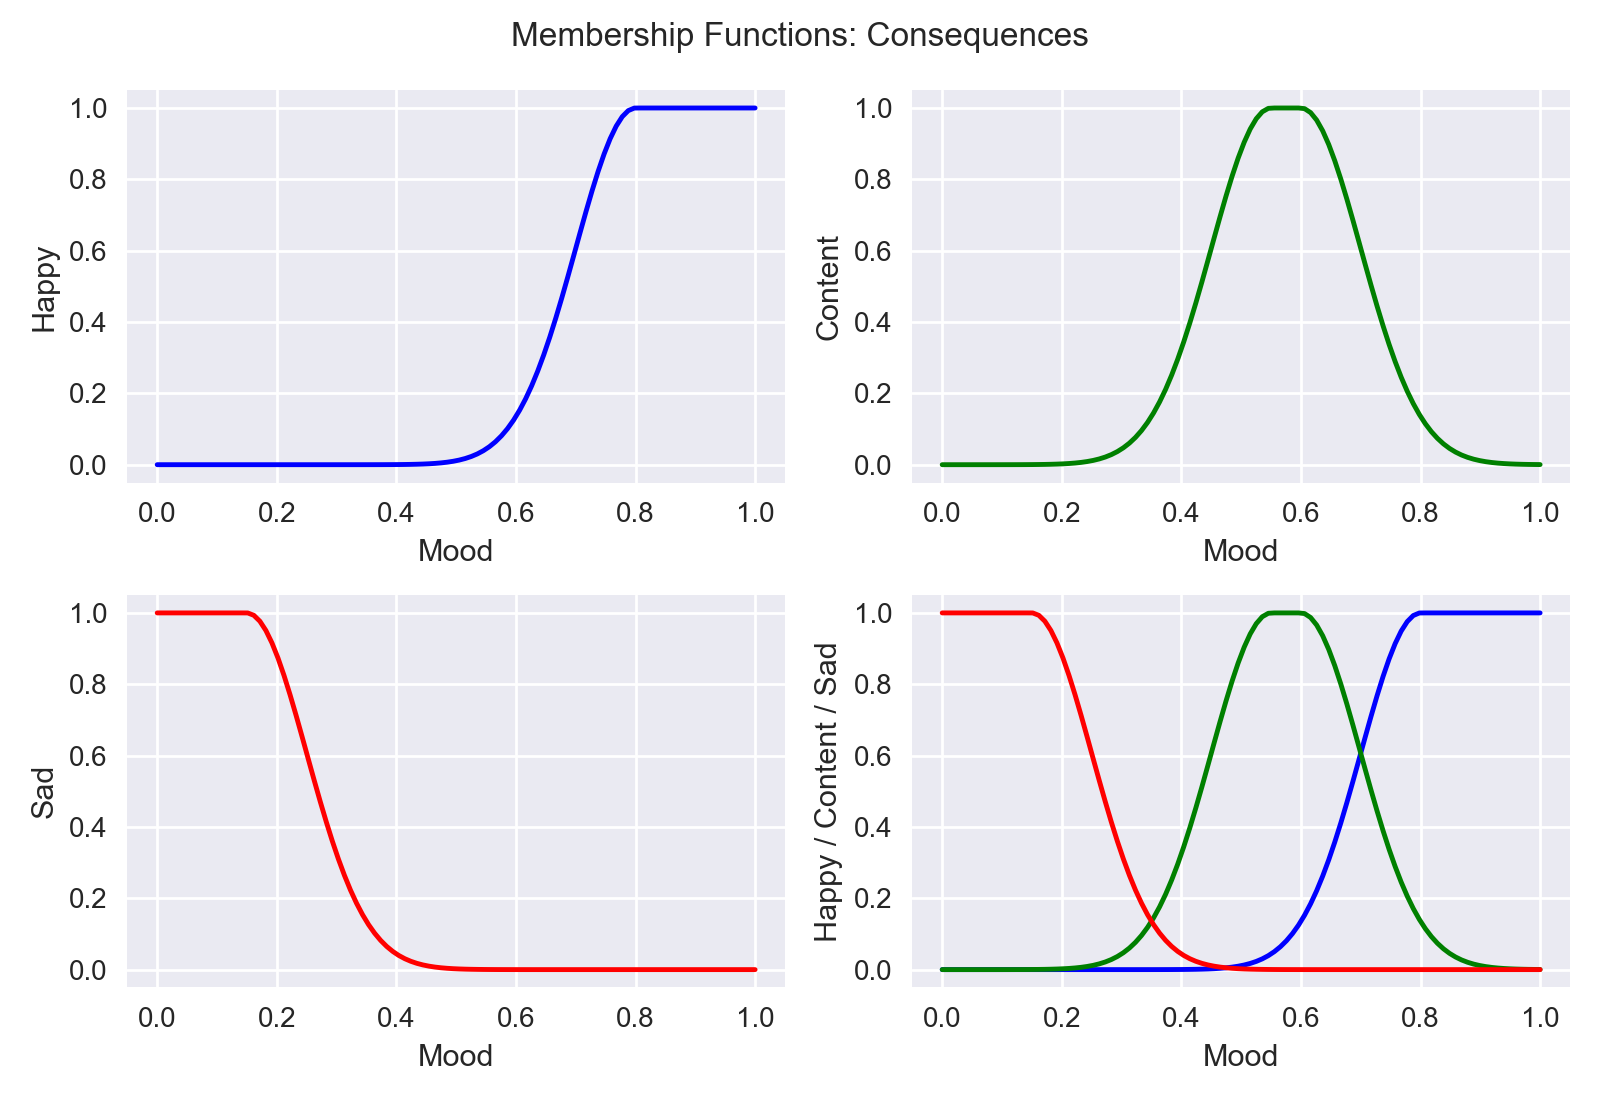

In [6]:
# Visualize consequence membership functions

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(mood, happy, "blue")
ax[0, 1].plot(mood, content, "green")
ax[1, 0].plot(mood, sad, "red")
ax[1, 1].plot(mood, happy, "blue")
ax[1, 1].plot(mood, content, "green")
ax[1, 1].plot(mood, sad, "red")

ax[0, 0].set_xlabel("Mood")
ax[0, 0].set_ylabel("Happy")
ax[0, 1].set_xlabel("Mood")
ax[0, 1].set_ylabel("Content")
ax[1, 0].set_xlabel("Mood")
ax[1, 0].set_ylabel("Sad")
ax[1, 1].set_xlabel("Mood")
ax[1, 1].set_ylabel("Happy / Content / Sad")

fig.suptitle("Membership Functions: Consequences")
fig.tight_layout()

In [7]:
# Create function for calculating a fuzzy outer operation on two inputs 
# - This function returns a matrix of a specified fuzzy operation (outer-product, outer-min, etc.)

def fuzzy_outer_operation(a, b, operation):

    a = a.reshape(-1)
    
    matrix = np.zeros((len(a), len(b))) 
    
    for i in range(len(a)):
        for j in range(len(b)):
                     
            # Lukasiewicz
            
            if(operation == "zadeh"):
                matrix[i, j] = np.minimum(1, 1 - a[i] + b[j])
                
            # Correlation Min
            
            elif(operation == "min"):
                matrix[i, j] = np.minimum(a[i], b[j])
            
            # Correlation Product
            
            elif(operation == "prod"):
                matrix[i, j] = a[i] * b[j]
                
    return matrix

In [8]:
# Create function for estimating relations
# - This method is defined as a fuzzy outer operation (like an outer product but with a relation operator)

def estimate_relations(all_propositions, all_consequences, choice):
    
    pbar = tqdm(total = len(all_propositions), desc = "Estimate Relations")
    
    all_relations = []
    for consequence, proposition in zip(all_consequences, all_propositions):
        relation = fuzzy_outer_operation(proposition, consequence, operation = choice)
        all_relations.append(relation)
        pbar.update(1)
    
    pbar.close()
    
    return all_relations
            
# Calculate relations
# - if hot then content
# - if cool then happy
# - if cold then sad

all_propositions = [hot, cool, cold]
all_consequences = [content, happy, sad]
all_relations = estimate_relations(all_propositions, all_consequences, relation_operator)

Estimate Relations:   0%|          | 0/3 [00:00<?, ?it/s]

In [16]:
# Evaluate testing observation

test_sample = 15.3

# Invoke fuzzification

test_hot = fuzz.interp_membership(temp, hot, test_sample)
test_cool = fuzz.interp_membership(temp, cool, test_sample)
test_cold = fuzz.interp_membership(temp, cold, test_sample)

print("Test Sample: Temp = %s" % (test_sample))
print("Memberships: Hot = %s, Cool = %s, Cold = %s"  % (test_hot, test_cool, test_cold))

Test Sample: Temp = 15.3
Memberships: Hot = 6.785962636359421e-15, Cool = 8.379874205202291e-05, Cold = 1.0


<IPython.core.display.Javascript object>


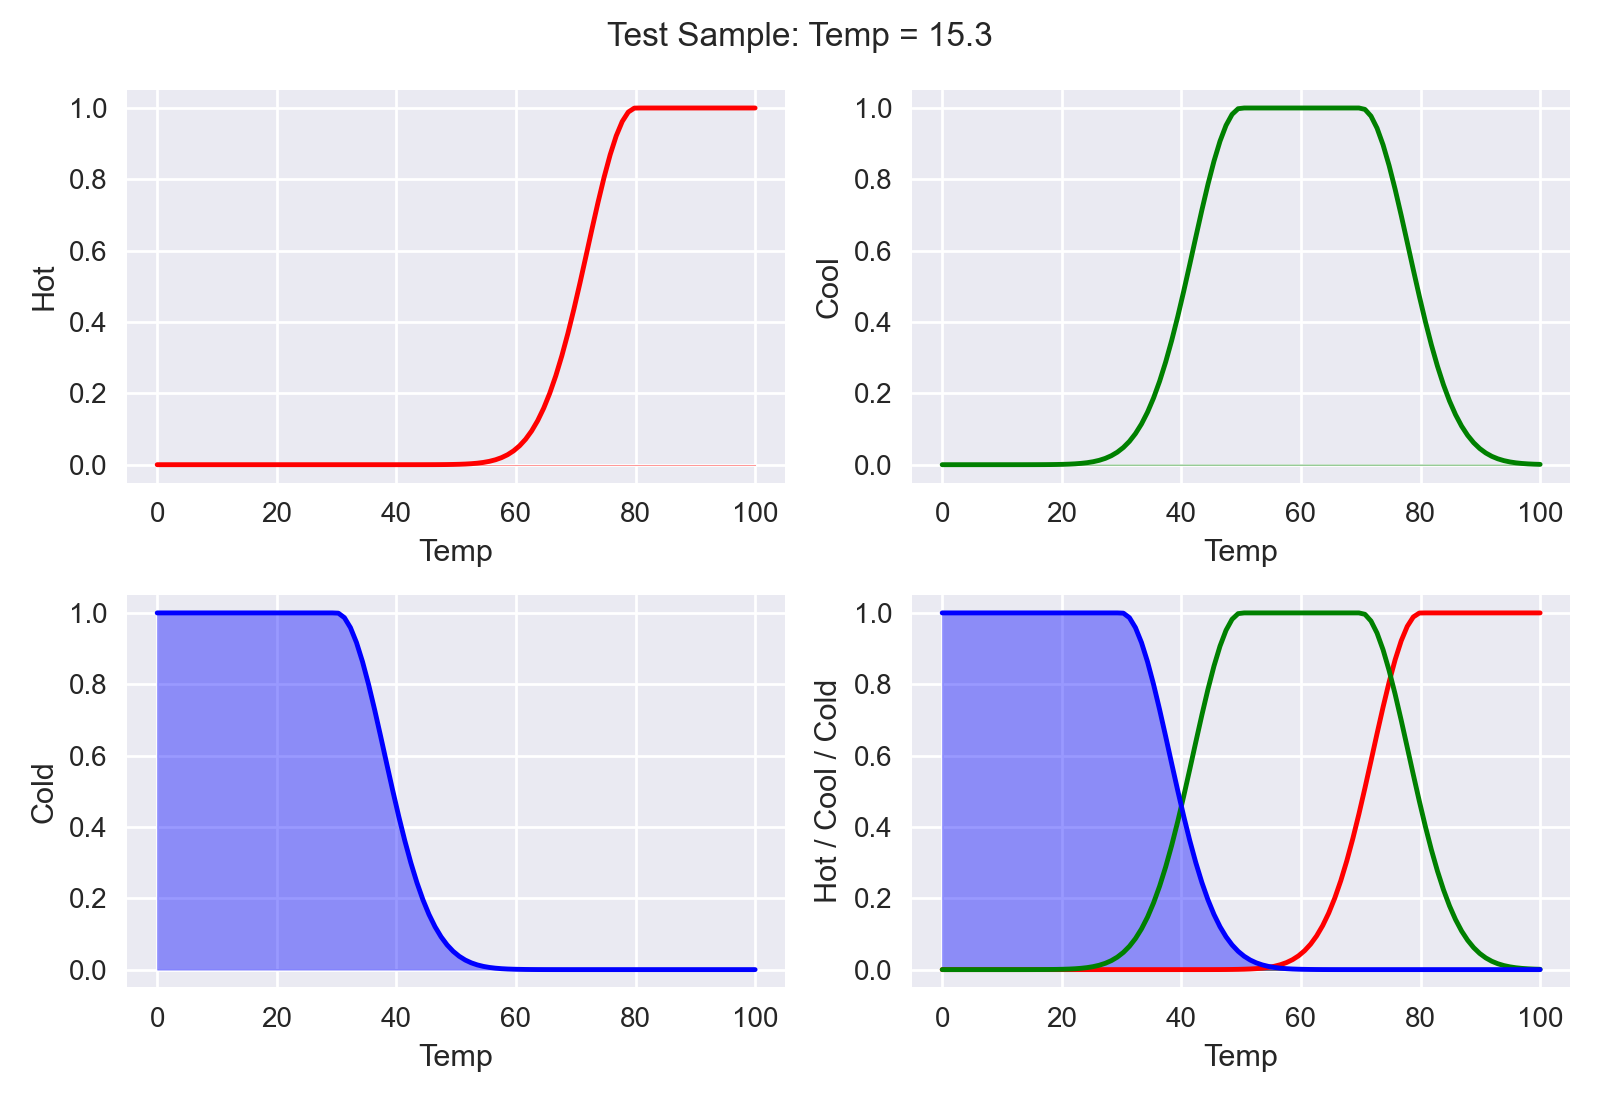

In [17]:
# Visualize membership functions of test observations

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(temp, hot, "red")
ax[0, 1].plot(temp, cool, "green")
ax[1, 0].plot(temp, cold, "blue")
ax[1, 1].plot(temp, hot, "red")
ax[1, 1].plot(temp, cool, "green")
ax[1, 1].plot(temp, cold, "blue")

ax[0, 0].fill_between(temp, np.minimum(hot, test_hot), color = "red", alpha = 0.4)
ax[0, 1].fill_between(temp, np.minimum(cool, test_cool), color = "green", alpha = 0.4)
ax[1, 0].fill_between(temp, np.minimum(cold, test_cold), color = "blue", alpha = 0.4)

ax[1, 1].fill_between(temp, np.minimum(hot, test_hot), color = "red", alpha = 0.4)
ax[1, 1].fill_between(temp, np.minimum(cool, test_cool), color = "green", alpha = 0.4)
ax[1, 1].fill_between(temp, np.minimum(cold, test_cold), color = "blue", alpha = 0.4)

ax[0, 0].set_xlabel("Temp")
ax[0, 0].set_ylabel("Hot")
ax[0, 1].set_xlabel("Temp")
ax[0, 1].set_ylabel("Cool")
ax[1, 0].set_xlabel("Temp")
ax[1, 0].set_ylabel("Cold")
ax[1, 1].set_xlabel("Temp")
ax[1, 1].set_ylabel("Hot / Cool / Cold")

fig.suptitle("Test Sample: Temp = %s" % (test_sample))

fig.tight_layout()

In [19]:
# Invoke compositional rule of inference 

def estimate_consequences(all_relations, all_propositions, choice):
    
    pbar = tqdm(total = len(all_propositions), desc = "Estimate Consequences")
    
    all_consequences = []
    for relation, proposition in zip(all_relations, all_propositions):
        
        # Well, for a scalar, copy it across to a vector that matches length of relation matrix
        
        consequence = []
        
        if(len(proposition.shape) == 0):
            
            relation = relation.T
            
            #proposition = np.expand_dims(np.asarray([proposition] * np.max(relation.shape)), 0)
            temp = np.zeros((1, np.max(relation.shape)))
            temp[0] = proposition
            proposition = temp     
            
            num_maxes = np.min(relation.shape)
            
            for i in range(num_maxes):
                
                current = np.expand_dims(relation[i], 0)
                
                # Compositonal rule of inference 
                
                #print(relation)
                #print(np.vstack([current, proposition]))
                output_croi = np.max(np.min(np.vstack([current, proposition]), axis = 0))
                
                #print(num_maxes, relation.shape, current.shape, proposition.shape)
            
                consequence.append(output_croi)
        
        all_consequences.append(consequence)
        
        pbar.update(1)
    
    pbar.close()
    
    return all_consequences

# - if hot then content
# - if cool then happy
# - if cold then sad  

test_propositions = [test_hot, test_cool, test_cold]
test_consequences = estimate_consequences(all_relations, test_propositions, relation_operator)

Estimate Consequences:   0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


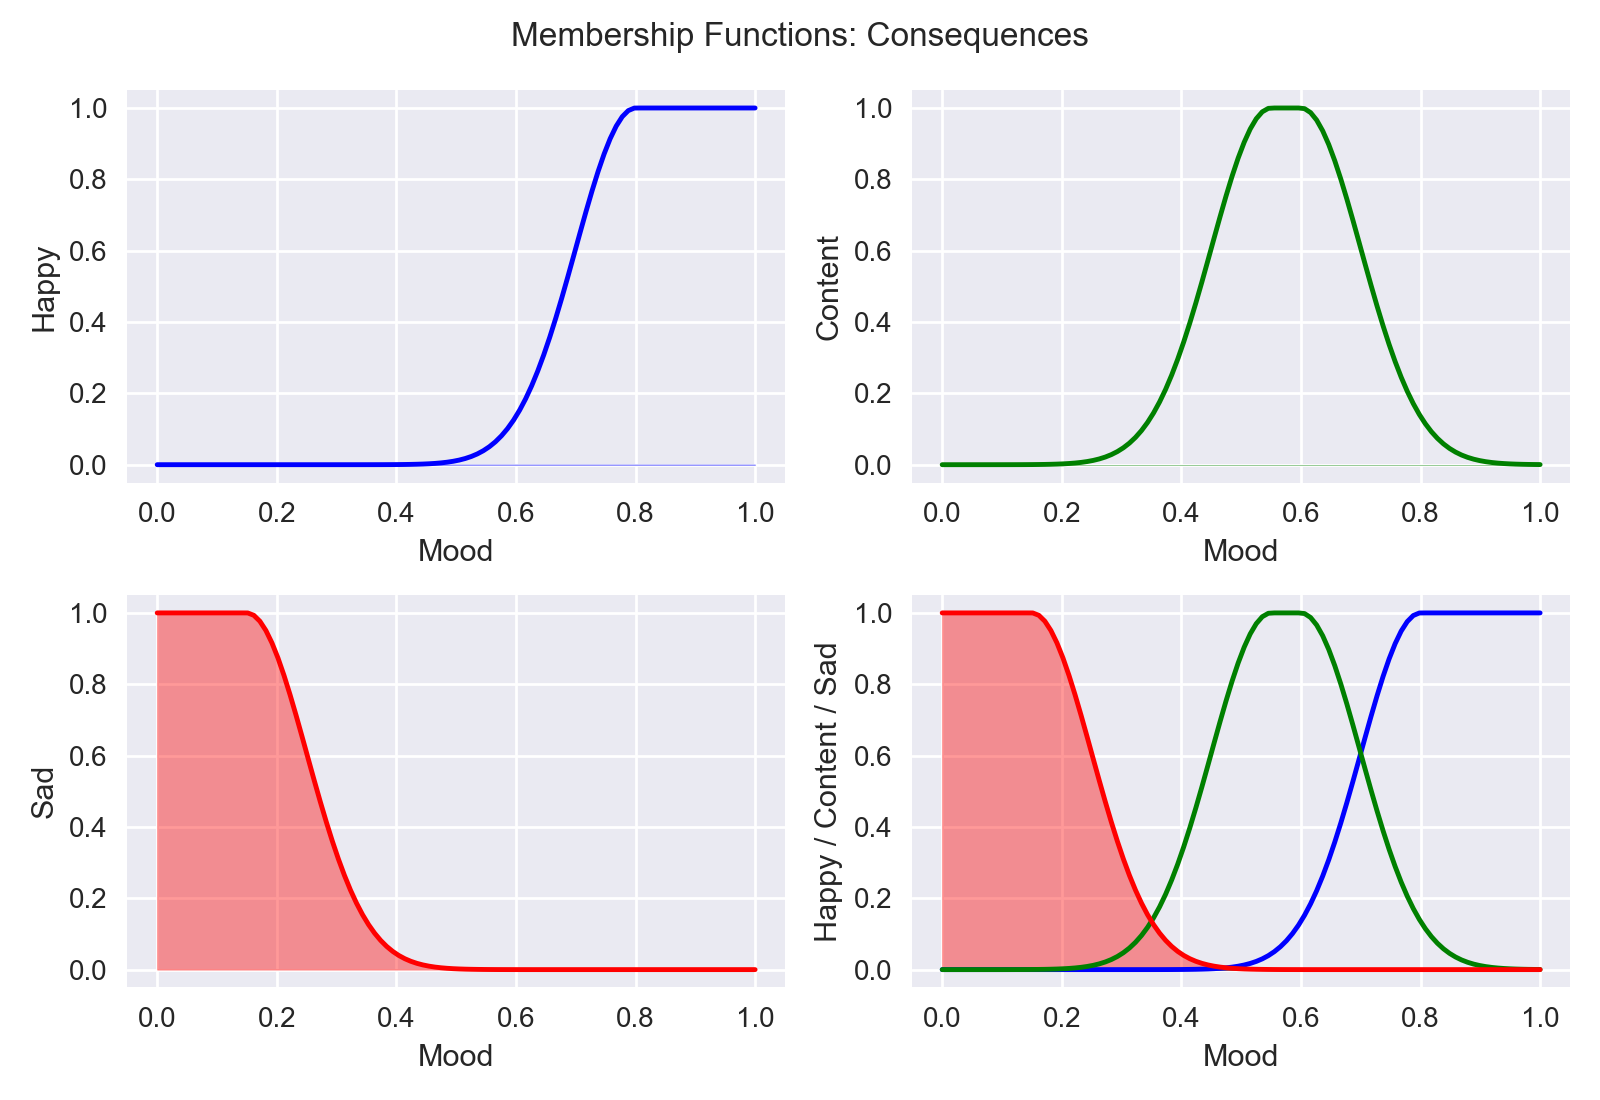

In [20]:
test_content, test_happy, test_sad = test_consequences

# Visualize membership functions of test observations w.r.t. consequences

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(mood, happy, "blue")
ax[0, 1].plot(mood, content, "green")
ax[1, 0].plot(mood, sad, "red")
ax[1, 1].plot(mood, happy, "blue")
ax[1, 1].plot(mood, content, "green")
ax[1, 1].plot(mood, sad, "red")


ax[0, 0].fill_between(mood, np.minimum(happy, test_happy), color = "blue", alpha = 0.4)
ax[0, 1].fill_between(mood, np.minimum(content, test_content), color = "green", alpha = 0.4)
ax[1, 0].fill_between(mood, np.minimum(sad, test_sad), color = "red", alpha = 0.4)

ax[1, 1].fill_between(mood, np.minimum(happy, test_happy), color = "blue", alpha = 0.4)
ax[1, 1].fill_between(mood, np.minimum(content, test_content), color = "green", alpha = 0.4)
ax[1, 1].fill_between(mood, np.minimum(sad, test_sad), color = "red", alpha = 0.4)


ax[0, 0].set_xlabel("Mood")
ax[0, 0].set_ylabel("Happy")
ax[0, 1].set_xlabel("Mood")
ax[0, 1].set_ylabel("Content")
ax[1, 0].set_xlabel("Mood")
ax[1, 0].set_ylabel("Sad")
ax[1, 1].set_xlabel("Mood")
ax[1, 1].set_ylabel("Happy / Content / Sad")

fig.suptitle("Membership Functions: Consequences")
fig.tight_layout()

In [21]:
def aggregation(fuzzy_sets, choice):
    
    for i in range(len(fuzzy_sets) - 1):
        
        if(i == 0):
            current = fuzzy_sets[i]
        else:
            current = output
            
        compare = fuzzy_sets[i + 1]
        
        if(choice == 0):
            output = np.fmax(current, compare)
        elif(choice == 1):
            output = np.asarray(current) + np.asarray(compare)
    
    return output

fuzzy_output = aggregation(test_consequences, choice = 0)

In [22]:
# Create defuzzification

def defuzz(fuzzy_output):
    
    # Centroid Defuzzification 
        
    return fuzz.defuzz(mood, fuzzy_output, "centroid")
    

mood_pred = defuzz(fuzzy_output)

activation = fuzz.interp_membership(mood, fuzzy_output, mood_pred) 
print(activation)

0.9999527796013993


<IPython.core.display.Javascript object>


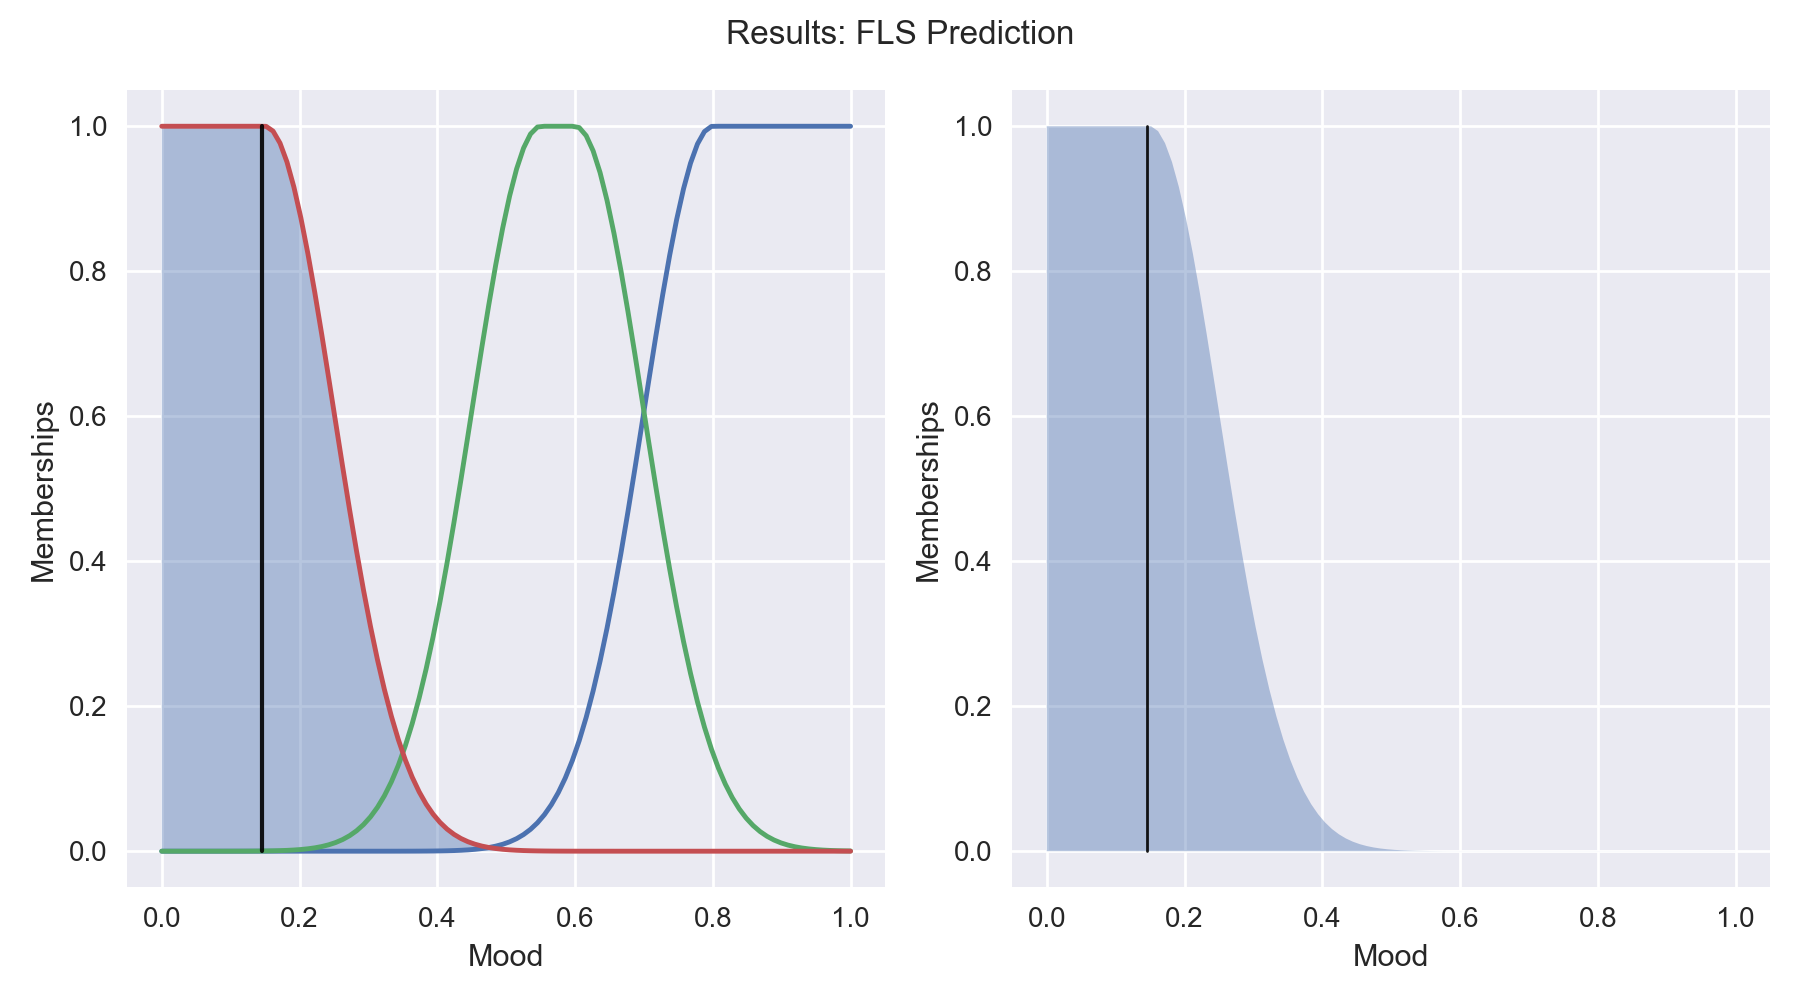

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (9, 5))
ax[0].plot(mood, happy)
ax[0].plot(mood, content)
ax[0].plot(mood, sad)
ax[0].fill_between(mood, np.zeros_like(mood), fuzzy_output, alpha = 0.4)
ax[0].plot([mood_pred, mood_pred], [0, activation], 'k', linewidth = 1.5, alpha = 0.9)

ax[1].fill_between(mood, np.zeros_like(mood), fuzzy_output, alpha = 0.4)
ax[1].plot([mood_pred, mood_pred], [0, activation], 'k', linewidth = 1, alpha = 0.9)

ax[0].set_xlabel("Mood")
ax[0].set_ylabel("Memberships")

ax[1].set_xlabel("Mood")
ax[1].set_ylabel("Memberships")

fig.suptitle("Results: FLS Prediction")
fig.tight_layout()